<a href="https://colab.research.google.com/github/cjprybol/BioSequences.jl/blob/master/example-notebooks/20250130_genome_hash_database_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


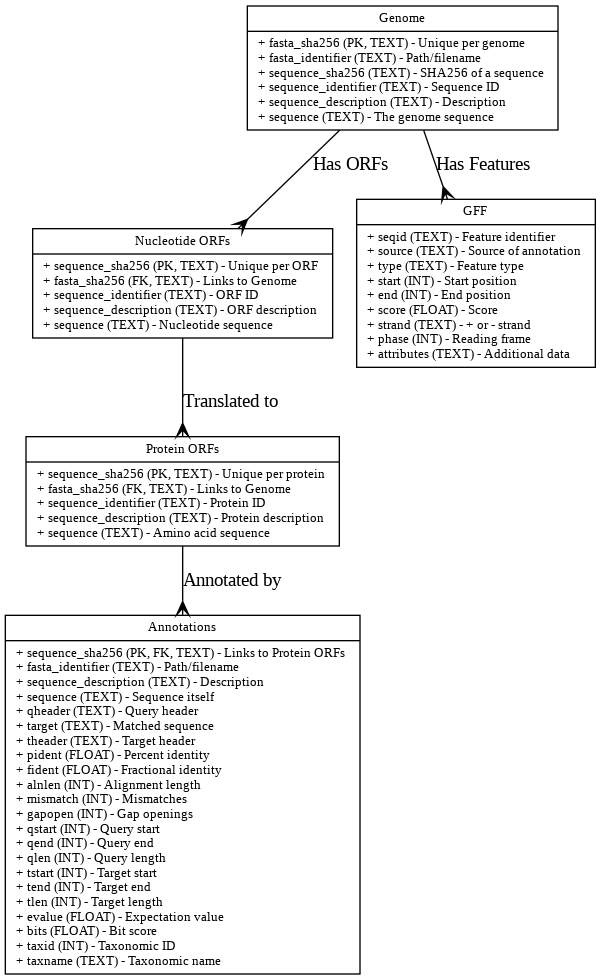

In [8]:
!sudo apt install graphviz
!pip install graphviz

# Re-generate the ERD with detailed table structures including types and descriptions

# Create a new ERD diagram with more details
erd_detailed = graphviz.Digraph('Genomic Database ERD', node_attr={'shape': 'record', 'fontsize': '10'})

# Genome Table
erd_detailed.node('Genome', '''{ Genome |
+ fasta_sha256 (PK, TEXT) - Unique per genome \\l
+ fasta_identifier (TEXT) - Path/filename \\l
+ sequence_sha256 (TEXT) - SHA256 of a sequence \\l
+ sequence_identifier (TEXT) - Sequence ID \\l
+ sequence_description (TEXT) - Description \\l
+ sequence (TEXT) - The genome sequence \\l
}''')

# Nucleotide ORFs Table
erd_detailed.node('Nucleotide_ORFs', '''{ Nucleotide ORFs |
+ sequence_sha256 (PK, TEXT) - Unique per ORF \\l
+ fasta_sha256 (FK, TEXT) - Links to Genome \\l
+ sequence_identifier (TEXT) - ORF ID \\l
+ sequence_description (TEXT) - ORF description \\l
+ sequence (TEXT) - Nucleotide sequence \\l
}''')

# Protein ORFs Table
erd_detailed.node('Protein_ORFs', '''{ Protein ORFs |
+ sequence_sha256 (PK, TEXT) - Unique per protein \\l
+ fasta_sha256 (FK, TEXT) - Links to Genome \\l
+ sequence_identifier (TEXT) - Protein ID \\l
+ sequence_description (TEXT) - Protein description \\l
+ sequence (TEXT) - Amino acid sequence \\l
}''')

# GFF Table
erd_detailed.node('GFF', '''{ GFF |
+ seqid (TEXT) - Feature identifier \\l
+ source (TEXT) - Source of annotation \\l
+ type (TEXT) - Feature type \\l
+ start (INT) - Start position \\l
+ end (INT) - End position \\l
+ score (FLOAT) - Score \\l
+ strand (TEXT) - + or - strand \\l
+ phase (INT) - Reading frame \\l
+ attributes (TEXT) - Additional data \\l
}''')

# Annotations Table
erd_detailed.node('Annotations', '''{ Annotations |
+ sequence_sha256 (PK, FK, TEXT) - Links to Protein ORFs \\l
+ fasta_identifier (TEXT) - Path/filename \\l
+ sequence_description (TEXT) - Description \\l
+ sequence (TEXT) - Sequence itself \\l
+ qheader (TEXT) - Query header \\l
+ target (TEXT) - Matched sequence \\l
+ theader (TEXT) - Target header \\l
+ pident (FLOAT) - Percent identity \\l
+ fident (FLOAT) - Fractional identity \\l
+ alnlen (INT) - Alignment length \\l
+ mismatch (INT) - Mismatches \\l
+ gapopen (INT) - Gap openings \\l
+ qstart (INT) - Query start \\l
+ qend (INT) - Query end \\l
+ qlen (INT) - Query length \\l
+ tstart (INT) - Target start \\l
+ tend (INT) - Target end \\l
+ tlen (INT) - Target length \\l
+ evalue (FLOAT) - Expectation value \\l
+ bits (FLOAT) - Bit score \\l
+ taxid (INT) - Taxonomic ID \\l
+ taxname (TEXT) - Taxonomic name \\l
}''')

# Define relationships
erd_detailed.edge('Genome', 'Nucleotide_ORFs', label='Has ORFs', arrowhead='crow', constraint='true')
erd_detailed.edge('Nucleotide_ORFs', 'Protein_ORFs', label='Translated to', arrowhead='crow', constraint='true')
erd_detailed.edge('Protein_ORFs', 'Annotations', label='Annotated by', arrowhead='crow', constraint='true')
erd_detailed.edge('Genome', 'GFF', label='Has Features', arrowhead='crow', constraint='true')

# Save and render the ERD diagram with more details
erd_detailed_path = "/content/genomic_database_erd_detailed"
erd_detailed.render(erd_detailed_path, format='png', cleanup=False)

# Provide the new download path
erd_detailed_download_path = f"{erd_detailed_path}.png"
erd_detailed_download_path

from IPython.display import Image
Image(filename=erd_detailed_download_path)